## Project 4: EU Hotel Reviews Analysis

In [1]:
# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem.porter import *  

import pandas as pd
import numpy as np

import re
import string

# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF,LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import exceptions
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings("ignore", category=exceptions.ConvergenceWarning)

from gensim import corpora, models, similarities, matutils
from gensim.models import CoherenceModel, word2vec

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
#import seaborn as sns

from collections import defaultdict
from collections import Counter

import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Skip this part: Start of Function Block

In [2]:
# Create a function to return a DataFrame from headers
def make_data_set(headers,master_data):
    return (master_data[headers])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Create a function to return add 4 new columns
def mk_senti_review(data):
    
    # make a new column based on rated reviews as positive, the rest to negative
    
    data['sentiment'] = np.where(data.Reviewer_Score >= 7.5, 'positive', 'negative') 
    
    # make a new column when more than 15 negative word as negative comments
    data['comments'] = np.where(data.Review_Total_Negative_Word_Counts >= 15,'negative','positive')

    #select reviews based on positive or negative comments
    data['Review'] = np.where(data.comments == 'negative',data.Negative_Review,data.Positive_Review)
    
    
    #select reviews based on positive or negative comments
    data['Combined_Review'] = data.Negative_Review + " " + data.Positive_Review
  
    
    #clean up data
    data=data.drop(['Review_Total_Negative_Word_Counts','Negative_Review','Positive_Review'],1)
    
    
    return (data)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Create a function create X y train/test data

def pre_process_Xy(input_data):

    # Text preprocess, remove numbers, captial letters and punctuation
    alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
    punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())


    input_data['Combined_Review'] = pos_neg_comments_df.Review.map(alphanumeric).map(punc_lower)


    # Assign X and y data sets
    X = input_data.Combined_Review
    y = input_data.sentiment

    # Split the data into training and test sets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    return (X_train, X_test, y_train, y_test)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
<ipython-input-4-b949b4ec25da>:6: DeprecationWarning: invalid escape sequence \w
  alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)


In [5]:
# Create a function for Count Vectorizer values
def Count_Vectorizer(train_data,test_data,params):
    
    c_vec = "0" # reset variable
    c_vec = CountVectorizer(params)
    
    #train and test data
    X_train_c_vec = c_vec.fit_transform(train_data)
    X_test_c_vec = c_vec.transform(test_data)
    
    #store results in DataFrame
    c_vec_results=pd.DataFrame(X_train_c_vec.toarray(), columns=c_vec.get_feature_names())
    
    return (c_vec_results,X_train_c_vec,X_test_c_vec)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Create a function to display keywords words

def display_topics(model, feature_names, no_top_words, topic_names=None):
    keywords = {}
    word_list = []
    for ix, topic in enumerate(model.components_):
        word_list = []
        if not topic_names or not topic_names[ix]:
            title = "Topic "+ str(ix+1)
                        
            
        else:
            print("Topic : '",topic_names[ix],"'")
        
        for i in topic.argsort()[:-5 - 1:-1]:    
            word_list.append(str(feature_names[i]))  
            keywords.update({title : word_list})
          
    words_df = pd.DataFrame(keywords)
       
    return (words_df.transpose())
        
        

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Create a function using Countvector and LSA to get topics from text
def topics_LSA(data):#Creating sparse matrix 
    vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english',
                                 token_pattern="\\b[a-z][a-z]+\\b")
    
    word_list = vectorizer.fit_transform(data) #example
    
    pd.DataFrame(word_list.toarray(), index=data, columns=vectorizer.get_feature_names())
    
    lsa = TruncatedSVD(5, random_state = 100)
    doc_topic = lsa.fit_transform(word_list)
          
    topics = display_topics(lsa, vectorizer.get_feature_names(), 5)
       
    return(topics)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Create a function using TFIDF and LSA to get topics from text
def topics_tfidf(data):
    ex_label = [e[:]+"..." for e in data]
    
    vectorizer =TfidfVectorizer(ngram_range=(1,3), stop_words='english',
                                token_pattern="\\b[a-z][a-z]+\\b")
    word_list = vectorizer.fit_transform(data)
    pd.DataFrame(word_list.toarray(), index=ex_label, columns=vectorizer.get_feature_names())

    lsa = TruncatedSVD(5, random_state = 100)
    doc_topic = lsa.fit_transform(word_list)
   
    topics = display_topics(lsa, vectorizer.get_feature_names(), 10)


    return(topics)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Create a function using NMF to get topics from text

def topics_NMF(data):
    ex_label = [e[:]+"..." for e in data]

    vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english',
                                 token_pattern="\\b[a-z][a-z]+\\b")
    wordlist = vectorizer.fit_transform(data)
    pd.DataFrame(wordlist.toarray(), index=ex_label, columns=vectorizer.get_feature_names())

    nmf_model = NMF(5,random_state = 100)
    doc_topic = nmf_model.fit_transform(wordlist)

    topics = display_topics(nmf_model, vectorizer.get_feature_names(), 5)
    return(topics)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Create a function to display word cloud
def show_wordcloud(data, color,  title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 100,
        colormap=color,
        min_word_length=5
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Create a function using gensim and LDA to get topics from text

def topics_gensim_LDA(data):
    
    count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")

    count_vectorizer.fit(data)
    
    # Create the term-document matrix
    # Transpose it so the terms are the rows
    doc_word = count_vectorizer.transform(data).transpose()
    
    pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()
    
    corpus = matutils.Sparse2Corpus(doc_word)
    id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
    
    lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5, random_state = 123)
    
    top_topics = lda.top_topics(corpus=corpus, texts=None, dictionary=None, window_size=None, 
                                coherence='u_mass', topn=5, processes=-1)
  
    return(dict_df(top_topics))

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Create a function to make word list 

def dict_df(list):
    
    output_dict = {}
    topic_words = []
    
    
    for i in range(5) :
        topic_words = []
        for j in range(5):
            topic_words.append(list[i][0][j][1])
            output_dict.update({"Topic "+str(i+1):topic_words}) 
            
      
    words_df = pd.DataFrame(output_dict)
    words_df.transpose()
    
    return(words_df)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Create a function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km,num_clusters):
         
    colour = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);

    plt.figure(figsize=(12,12))
    plt.ylabel('Longitude', fontsize=12)
    plt.xlabel('Latitude', fontsize=12)
    for i in range(num_clusters):
        plt.plot(X.lng[km.labels_==i].values,X.lat[km.labels_==i].values,colour[i])
        plt.plot(km.cluster_centers_[i,0],km.cluster_centers_[i,1], marker = 'x')
    plt.show   

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Create a function to find the user id given the country
def find_user_id(input_text,lk_up_tab):
    error = "Not available. Please try to input another country"
    input_text = input_text.strip() 
    input_text = " "+input_text+" "
    if input_text in lk_up_tab:
        user_id = lk_up_tab[input_text]
    else:
        print(error)
                 
    return(int(user_id))

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Create a function to find the hotel name given the hotel id
def find_hotel_name(hotel_id,lk_up_list):
    hotel_id_list = []

    for k in hotel_id:
        hotel_id_list.append(k[0])
    

    htl_search = dict(zip(lk_up_list.values(), lk_up_list.keys()))


    list_rec_hotel = []
    for h in hotel_id_list:
        list_rec_hotel.append(htl_search[str(h)])
    
    return(list_rec_hotel)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Create a function to lookup for hotel recommendation
def get_hotel_recmd(hotel_user_map,user_hotel_map,u1):
    results = []
    for m in user_hotel_map[u1]: # for the hotel a this user stayed
        for u in hotel_user_map[m]: # get others who stayed in this hotel
            results.extend(user_hotel_map[u]) # find the other hotels other people stayed
    return Counter(results).most_common(5) # return tuples of (most common id, count)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Create a function to assign values into the lookup list 
def make_map(recmdr_df_sml):

    for l in range(len(recmdr_df_sml)):
        user_hotel_map[int(recmdr_df_sml['user_id'][l])].append(int(recmdr_df_sml['hotel_id'][l]))
  

    for m in range(len(recmdr_df_sml)):
        hotel_user_map[int(recmdr_df_sml['hotel_id'][m])].append(int(recmdr_df_sml['user_id'][m]))
    
    return(user_hotel_map,hotel_user_map)


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Create a function to as 2 columns to dataset
def add_user_hotel(df):
    user_lk_up = {}   
    user_append_list = []
    
    user_list_arr = df.Reviewer_Nationality.unique()
    user_list_arr.sort()
    
    for i in range(len(user_list_arr)):
        user_lk_up.update({user_list_arr[i]: str(i)})
    
    show_wordcloud(user_lk_up, 'gist_earth')
    
    
    for a in recmdr_df['Reviewer_Nationality']:
        name = str(a)
        user_append_list.append(int(user_lk_up[name]))

    df['user_id'] = user_append_list
    
    hotel_list_arr = df.Hotel_Name.unique()
    hotel_list_arr.sort()
    hotel_lk_up = {}

    for i in range(len(hotel_list_arr)):
        hotel_lk_up.update({hotel_list_arr[i]: str(i)})
    
    hotel_append_list = []
    for b in df['Hotel_Name']:
        name = str(b)
        hotel_append_list.append(int(hotel_lk_up[name]))

    df['hotel_id'] = hotel_append_list
  
    df['hotel_user'] = df['hotel_id'].apply(str) + df['user_id'].apply(str)
    
    return(df,hotel_lk_up,user_lk_up)


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# function to clean text  

def review_to_words(raw_review):  
    # Remove non-letters   
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)   
  
    # Convert to lower case, split into individual words  
    words = letters_only.lower().split()  
      
    # Remove Stopwords. In Python, searching a set is much faster than searching  
    # list, so convert the stop words to a set  
    
    
    stops = set(stopwords.words("english"))   
 
    # Remove stop words  
    meaningful_words = [w for w in words if not w in stops] #returns a list   
   
    #disabled Stemming
    singles = meaningful_words
    # Stem words. Need to define porter stemmer above  
    #stemmer = PorterStemmer() 
    #[stemmer.stem(word) for word in meaningful_words]  
    # Join the words back into one string separated by space,   
    #and return the result.  
    return( " ".join( singles ))   
  


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# build a corpus for the word2vec model  

def build_corpus(data):  
    "Creates a list of lists containing words from each sentence"  
    corpus = []  
    for sentence in data:  
        word_list = sentence.split(" ")  
        corpus.append(word_list)   

    return corpus  
  
  

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# make function to compute the dimensionality reduction  
# and then produce the biplot  

def tsne_plot(model):  
    "Creates a TSNE model and plots it"  
    labels = []  
    tokens = []  

    for word in model.wv.vocab:  
        tokens.append(model[word])  
        labels.append(word)  

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)  
    new_values = tsne_model.fit_transform(tokens)  

    
    x = []  
    y = []  
    for value in new_values:  
        x.append(value[0])  
        y.append(value[1])  

    plt.figure(figsize=(8, 8))   
    for i in range(len(x)):  
        plt.scatter(x[i],y[i])  
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),  
                     xytext=(5, 2),  
                     textcoords='offset points',  
                     ha='right',  
                     va='bottom')  
    
    plt.show()  
  
 
 

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#Create a function to display LDAvis
def plot_LDAvis(data):
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                    stop_words = 'english',
                                    lowercase = True,
                                    token_pattern = r'\b[a-zA-Z]{3,}\b',
                                    max_df = 0.5, 
                                    min_df = 10)
    dtm_tf = tf_vectorizer.fit_transform(data)
 

    tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
    dtm_tfidf = tfidf_vectorizer.fit_transform(data)
    lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
    lda_tf.fit(dtm_tf)

    # for TFIDF DTM
    lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
    lda_tfidf.fit(dtm_tfidf)

    pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')

    return (pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne'))

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Read in Hotel review data and Data Cleaning

In [23]:
master_data = pd.read_csv("C:\\Users\\Admin\\Downloads\\Hotels2017.csv")

master_data.head(1)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   

   Review_Total_Positive_Word_Counts  \
0                                 11   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   

         lat       lng  
0  52.360576  4.915968

In [24]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               64809 non-null  object 
 1   Additional_Number_of_Scoring                64809 non-null  int64  
 2   Review_Date                                 64809 non-null  object 
 3   Average_Score                               64809 non-null  float64
 4   Hotel_Name                                  64809 non-null  object 
 5   Reviewer_Nationality                        64809 non-null  object 
 6   Negative_Review                             64809 non-null  object 
 7   Review_Total_Negative_Word_Counts           64809 non-null  int64  
 8   Total_Number_of_Reviews                     64809 non-null  int64  
 9   Positive_Review                             64809 non-null  object 
 10  Review_Tot

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#removing duplicates
master_data = master_data.drop_duplicates()

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Make dataset for comments analysis

In [26]:
# make dataset from postive/ negative comments
#define required headers
pos_neg_comments_hdrs = ['Negative_Review','Review_Total_Negative_Word_Counts',
                         'Positive_Review','Reviewer_Score']

pos_neg_comments_df = make_data_set(pos_neg_comments_hdrs, master_data )

pos_neg_comments_df = mk_senti_review(pos_neg_comments_df)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

### Exploratory data analysis

In [27]:
#added 3 columns (sentiments, comments, Combined_Review )
pos_neg_comments_df.head()

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reviewer_Score sentiment  comments  \
0             2.9  negative  negative   
1             7.5  positive  positive   
2             6.5  negative  negative   
3             7.9  positive  negative   
4            10.0  positive  positive   

                                              Review  \
0   I am so angry that i made this post available...   
1   No real complaints the hotel was great great ...   
2   Even though the pictures show very clean room...   
3   The aircondition makes so much noise and its ...   
4   Rooms were stunningly decorated and really sp...   

                                     Combined_Review  
0   I am so angry that i made this post available...  
1  No Negative  No real complaints the hotel was ...  
2   Even though the pictures show very clean room...  
3   The aircondition makes so much noise and its ...  
4   Nothing all great   Rooms were stunningly dec...

In [28]:
# There are 64k reviews in this dataset
len(pos_neg_comments_df)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


64751

In [29]:
pos_neg_comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64751 entries, 0 to 64808
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer_Score   64751 non-null  float64
 1   sentiment        64751 non-null  object 
 2   comments         64751 non-null  object 
 3   Review           64751 non-null  object 
 4   Combined_Review  64751 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.0+ MB


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Note that the dataset has mostly positive reviews
pos_neg_comments_df.sentiment.value_counts(normalize=True)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


positive    0.776281
negative    0.223719
Name: sentiment, dtype: float64

In [31]:
# Note that the dataset has mostly positive reviews
pos_neg_comments_df.comments.value_counts(normalize=True)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


positive    0.604794
negative    0.395206
Name: comments, dtype: float64

Picking 5000 sets for analysis

In [32]:
pos_neg_comments_df= pos_neg_comments_df[:5000]

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#the ratios in reduced dataset remains similiar
pos_neg_comments_df.sentiment.value_counts(normalize=True)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


positive    0.7764
negative    0.2236
Name: sentiment, dtype: float64

In [34]:
# #the ratios in reduced dataset remains similiar
pos_neg_comments_df.comments.value_counts(normalize=True)

## Maps Generation and Kmeans Clustering

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


positive    0.599
negative    0.401
Name: comments, dtype: float64

In [35]:
# make dataset for map display
#define required headers
maps_disp_hdr = ['Average_Score', 'Hotel_Name', 'lat','lng']

maps_disp_df= make_data_set(maps_disp_hdr, master_data )

maps_disp_df.info()

#removing duplicates
maps_disp_df.dropna(axis=0,subset=['lat','lng'],inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64751 entries, 0 to 64808
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Score  64751 non-null  float64
 1   Hotel_Name     64751 non-null  object 
 2   lat            64378 non-null  float64
 3   lng            64378 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.5+ MB


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [36]:
maps_disp_df = maps_disp_df.drop_duplicates(subset=['Hotel_Name'] )
X=maps_disp_df[['lng', 'lat']]

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


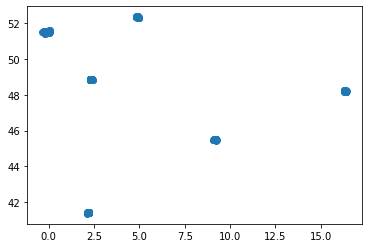

In [37]:
# Plot lat and lon on scatter plot
plt.scatter(x=maps_disp_df['lng'], y = maps_disp_df['lat'])
plt.show()

In [38]:
maps_disp_df.info()

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 64754
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Score  1467 non-null   float64
 1   Hotel_Name     1467 non-null   object 
 2   lat            1467 non-null   float64
 3   lng            1467 non-null   float64
dtypes: float64(3), object(1)
memory usage: 57.3+ KB


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


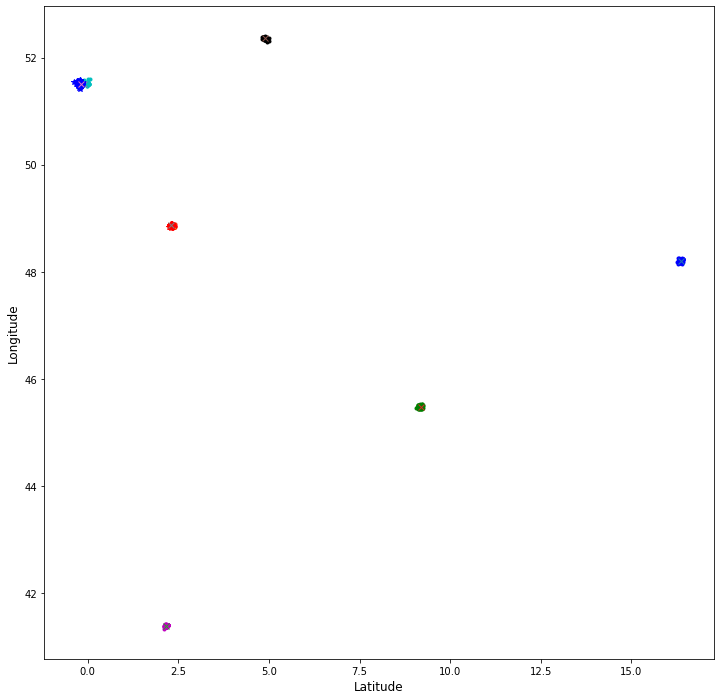

In [39]:
# Ploting clusters using kMeans
num_clusters=8
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1).fit(X)
display_cluster(X,km,num_clusters)

In [40]:
# Ploting clusters in map
fig = px.scatter_geo(data_frame = maps_disp_df,
                     locationmode = 'geojson-id',
                     lon = maps_disp_df['lng'],
                     lat = maps_disp_df['lat'],
                     hover_data = maps_disp_df
                    
                     )
fig.update_layout(
    title_text = 'Hotel Reviews Locations',
    showlegend = False,
    geo = dict(scope = 'europe', landcolor = 'lightgreen' )
    )

fig.show()

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Make a T-sne model plot

In [41]:
#make word list based on pos_neg_comments_df column "Combined_Review"  
processed_comments = [ review_to_words(text) 
                      for text in pos_neg_comments_df.Combined_Review] 

#Build Corpus from processed comments
corpus = build_corpus(processed_comments) 
 
# run the model  
model = word2vec.Word2Vec(corpus, 
                          size=100, window=5, min_count=1000, workers=4) 
 

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\Admin\anaconda3\envs\metis\lib\sit

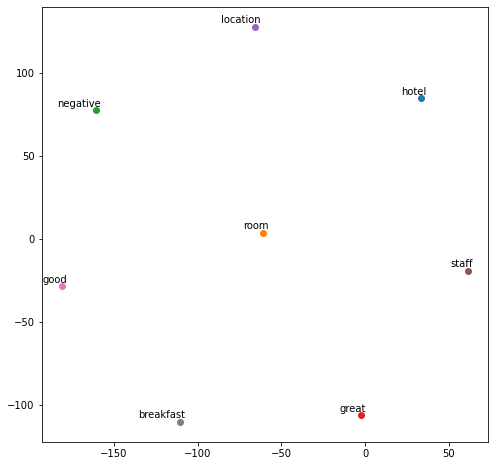

In [42]:
# plot the result
tsne_plot(model)

In [43]:
# run pyLDAvis in function
display_LDA = plot_LDAvis(processed_comments)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\sklearn\feature_extraction\text.py:1799: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



In [44]:
display_LDA

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
2      -10.878068   10.538728       1        1  8.627178
16     -60.884026  -75.591820       2        1  8.143014
7       -2.336119  -53.289074       3        1  7.183755
8      -61.385319  -12.914634       4        1  6.304503
18     -28.737743  126.296997       5        1  5.967360
6        1.066606 -123.552811       6        1  5.816176
19      45.140720   -7.947869       7        1  5.518669
4     -140.795975  -98.530548       8        1  5.219231
5       61.531681  -83.240562       9        1  5.060678
13     -72.563057 -140.396881      10        1  4.556599
17      15.984491   63.578186      11        1  4.334170
1     -160.851624   68.945145      12        1  4.314125
12      85.961830   51.922935      13        1  4.126517
3      -99.020836  109.936348      14        1  4.122164
0     -176.764130   -8.681684      15        1  4.022397
11    -117.189880  -37.420200      16        1  3.931224
9      108.829918  -22.946203      17        1  3.877221
14      47.588097  121.934814      18        1  3.727720
10    -106.467834   30.176889      19        1  2.907633
15     -50.613804   59.328842      20        1  2.239663, topic_info=          Term         Freq        Total Category  logprob  loglift
739   positive   409.000000   409.000000  Default  30.0000  30.0000
648   negative  1087.000000  1087.000000  Default  29.0000  29.0000
82         bed   916.000000   916.000000  Default  28.0000  28.0000
838       room  3467.000000  3467.000000  Default  27.0000  27.0000
881     shower   406.000000   406.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
112  breakfast    20.581067  1317.385581  Topic20  -4.3788  -0.3602
955       stay    14.823260   515.131331  Topic20  -4.7069   0.2506
562   location    12.074527  1714.497380  Topic20  -4.9120  -1.1569
710     people     9.842583   166.038310  Topic20  -5.1164   0.9733
82         bed    10.776363   916.788402  Topic20  -5.0258  -0.6447

[1150 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         2  0.262340  absolutely
1         5  0.220918  absolutely
1         7  0.013807  absolutely
1         9  0.386606  absolutely
1        11  0.041422  absolutely
...     ...       ...         ...
1140     13  0.312889       wrong
1140     20  0.026074       wrong
1143      4  0.142139         yes
1143      8  0.639624         yes
1143     14  0.142139         yes

[4355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 17, 8, 9, 19, 7, 20, 5, 6, 14, 18, 2, 13, 4, 1, 12, 10, 15, 11, 16])

In [45]:
#save in html format
#pyLDAvis.save_html(display_LDA, 'C:\\Users\\Admin\\Downloads\\lda.html')


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## NLP Topic Modeling 

### Preprocessing text 

In [46]:
#making Train / Test sets
X_train, X_test, y_train, y_test = pre_process_Xy(pos_neg_comments_df)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [47]:
# Applying Count Vectorizer in Train/Test data
para1 = "stop_words ='english'"
C_Vec_1_results, X_train_c_vec_1, X_test_c_vec_1 = Count_Vectorizer(X_train,X_test,para1)

para2 = "ngram_range = (1,2), binary= True, stop_words='english'"
C_Vec_2_results, X_train_c_vec_2, X_test_c_vec_2  = Count_Vectorizer(X_train,X_test,para2)


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass input=stop_words ='english' as keyword args. From version 0.25 passing these as positional arguments will result in an error

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass input=ngram_range = (1,2), binary= True, stop_words='english' as keyword args. From version 0.25 passing these as positional arguments will result in an error



Spliting the data to Postive and Negative reviews

In [48]:
#Generating list of Positive and Negative Reviews
data_pos = pd.DataFrame(pos_neg_comments_df[pos_neg_comments_df['comments'] == 'positive'])

data_neg = pd.DataFrame(pos_neg_comments_df[pos_neg_comments_df['comments'] == 'negative'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Let's see what the postive people have to say

In [49]:
#Using LSA to generate positive word list
topic_LSA_pos = topics_LSA(data_pos['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [50]:
topic_LSA_pos

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0            1          2               3          4
Topic 1     staff         room      hotel        location      great
Topic 2      room  comfortable        bed            good      great
Topic 3  location        hotel      great  great location      rooms
Topic 4     hotel         stay    amazing            walk     really
Topic 5      good     location  breakfast   good location  excellent

We can deduce following are good points customers liked about the Hotels:
1) Friendly and Helpful staff , Comfortable room , Good Location of Hotel and Great Breakfast
<br>2) Comfortable rooms and beds, Nice Views, Clean Bathroom, small breakfast?  
3) Good Hotel Location in London, perfect walking distance to stations and restaurants, great rooms
<br>4) Really Best stay at the Beautiful Hotel, Amazing bathroom, Highly recommended
<br>5) Good Location, Excellent Breakfast, Nice and Friendly Staff, Quiet, clean and comfortable rooms, close to ammendities

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



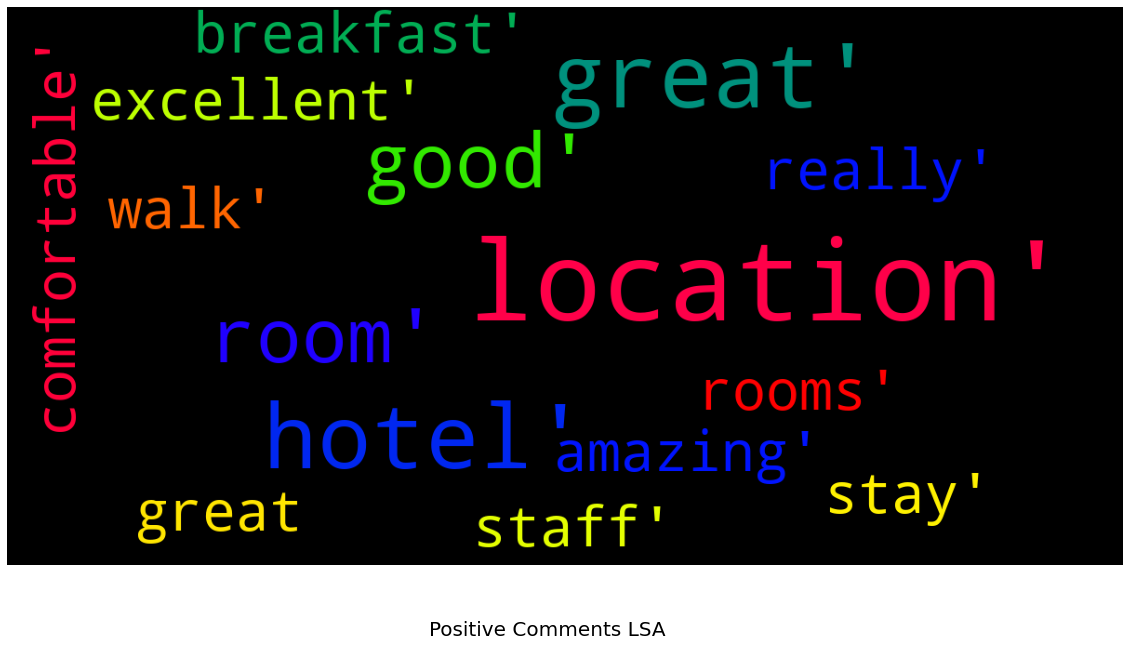

In [51]:
# print wordcloud
display = topic_LSA_pos.values.tolist()

show_wordcloud(display, 'prism', title= "Positive Comments LSA")



Let's see what the negative people have to say

In [52]:
#Using LSA to generate positive word list
topic_LSA_neg = topics_LSA(data_neg['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
topic_LSA_neg

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0          1      2         3            4
Topic 1       room      hotel  small       bed        staff
Topic 2      hotel  breakfast  staff     rooms         like
Topic 3  breakfast     shower  staff     small         good
Topic 4        bed      rooms  small  bathroom       shower
Topic 5    booking       didn  staff       day  booking com

We can deduce following are area customers would like improvement:

1) Hotel room and Bed is small, did not have breakfast, lack of staff at night
<br>
2) did not like the hotel Rooms,breakfast, service from staff at night, took long time to find booking. 
<br>
3) Did not like the staff, food and coffee at breakfast, small rooms and shower,price?
<br>
4) small rooms, bed, bathroom, shower with no water at night, door?, just?
<br>
5) 'staff did not get booking right, no one at reception at night, booking?, stay?, told?, bar?, just?, '

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



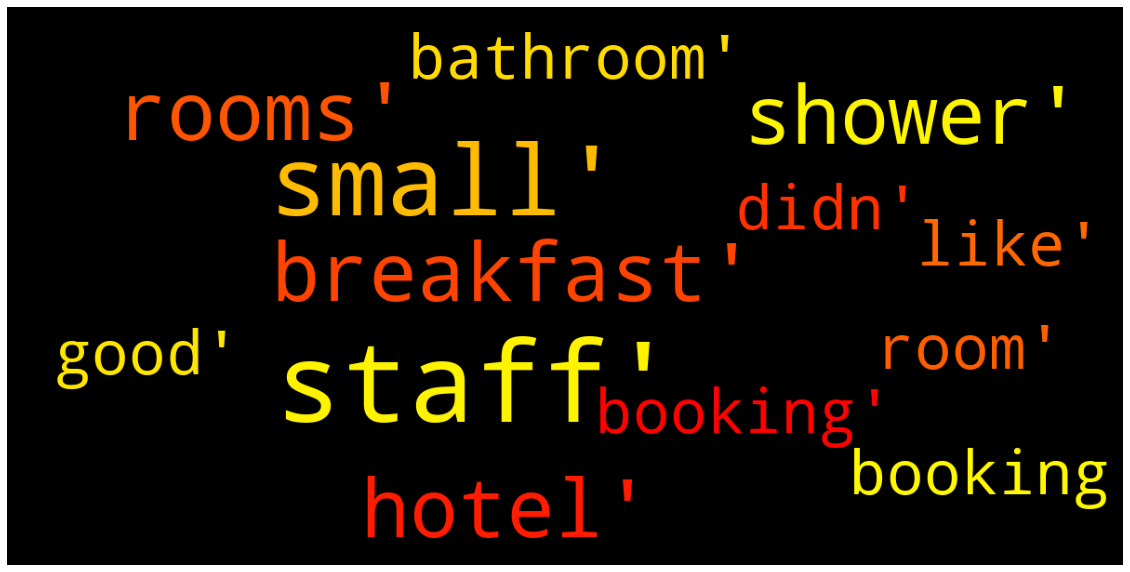

In [54]:
#print word cloud
display = topic_LSA_neg.values.tolist()
show_wordcloud(display, 'autumn')

Let's try tfidf Vectorizer with LSA

In [55]:
tfidf_pos_topics = topics_tfidf(data_pos['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



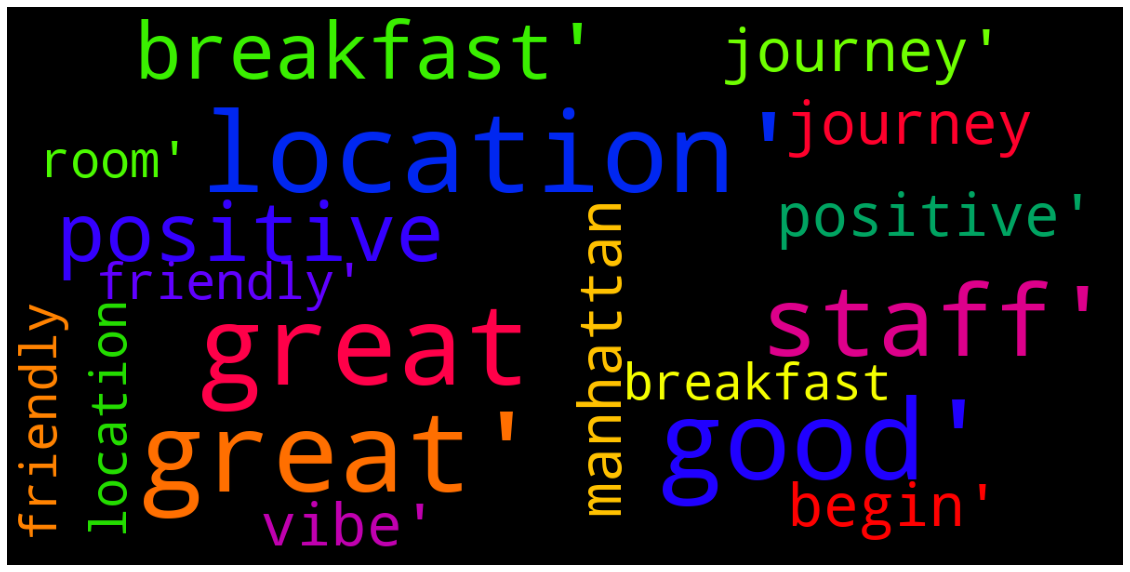

In [56]:
#print word cloud
display = tfidf_pos_topics.values.tolist()
show_wordcloud(display, 'prism')

In [57]:
tfidf_neg_topics = topics_tfidf(data_neg['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



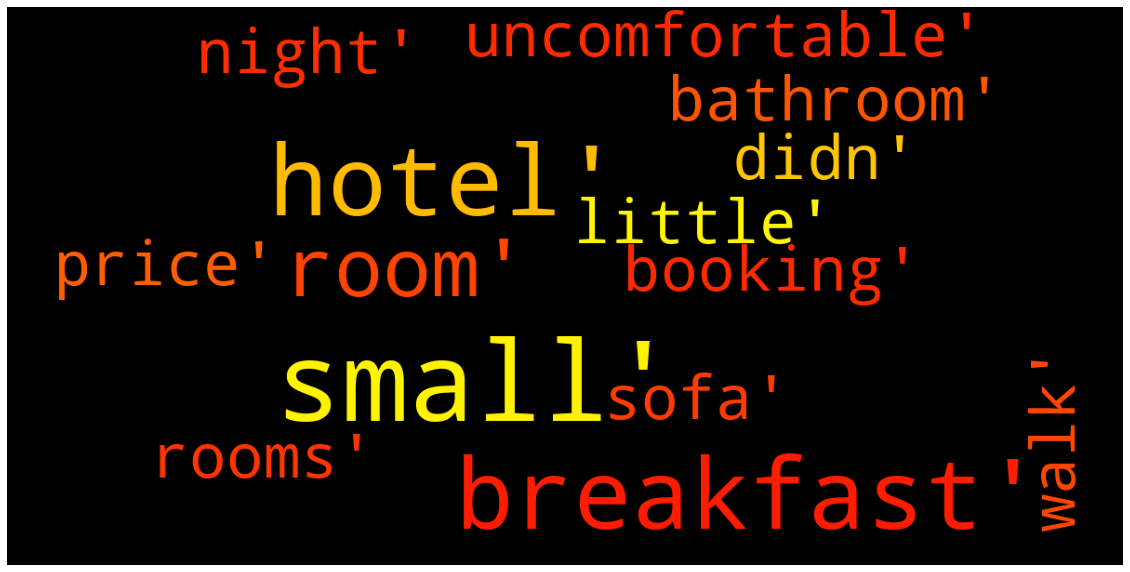

In [58]:
#print word cloud
display = tfidf_neg_topics.values.tolist()
show_wordcloud(display, 'autumn')

Using Non-Negative Matrix Factorization (NMF) Model

In [59]:
#Using NMF to generate postive word list
NMF_pos_topics = topics_NMF(data_pos['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [60]:
NMF_pos_topics

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0            1               2               3  \
Topic 1     staff     friendly         helpful  staff friendly   
Topic 2      room  comfortable             bed           clean   
Topic 3  location        great  great location         perfect   
Topic 4     hotel         stay            walk         amazing   
Topic 5      good    breakfast        location       excellent   

                        4  
Topic 1  friendly helpful  
Topic 2              nice  
Topic 3             rooms  
Topic 4            really  
Topic 5     good location

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



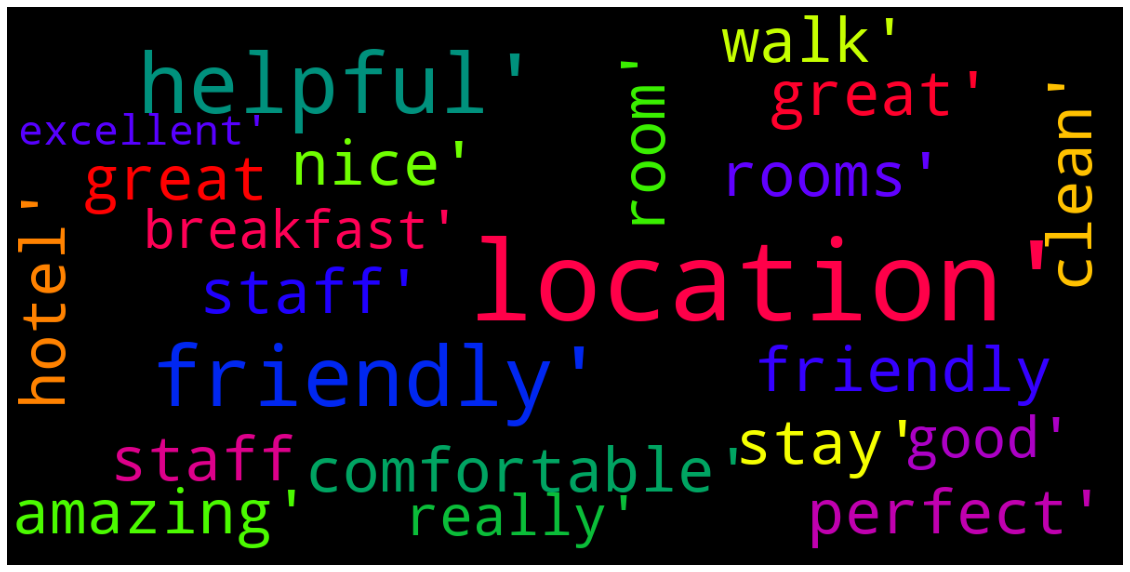

In [61]:
#print word cloud
display = NMF_pos_topics.values.tolist()
show_wordcloud(display, 'prism')

In [62]:
#Using NMF to generate negative word list
NMF_neg_topics = topics_NMF(data_neg['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [63]:
NMF_neg_topics

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0         1       2        3           4
Topic 1       room    booked  double      bed       night
Topic 2      hotel     night    like   people       staff
Topic 3  breakfast      food  coffee     good  restaurant
Topic 4      small  bathroom  shower      bed       rooms
Topic 5      staff      didn     did  booking       rooms

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



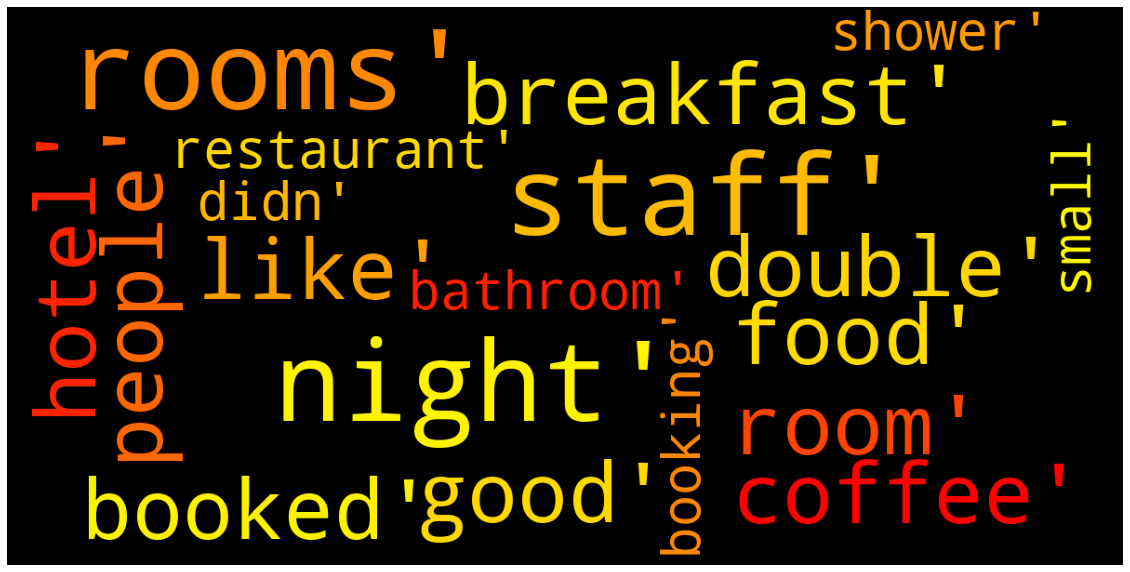

In [64]:
display = NMF_neg_topics.values.tolist()
show_wordcloud(display, 'autumn')

In [65]:
#Using LDA to generate postive word list
LDA_pos_topics = topics_gensim_LDA(data_pos['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
LDA_pos_topics


C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 1   Topic 2    Topic 3   Topic 4      Topic 5
0     staff     hotel   location  location         room
1  friendly     staff  breakfast     great          bed
2  location  location       good     hotel     positive
3   helpful  friendly  excellent     staff  comfortable
4      room     clean      great   station        staff

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



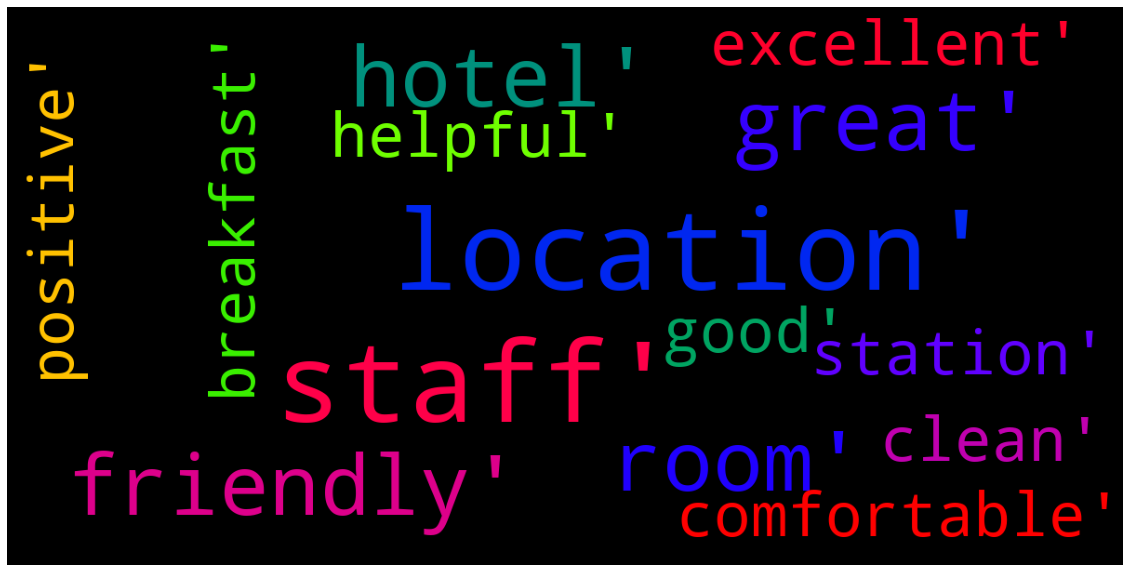

In [67]:
display = LDA_pos_topics.values.tolist()
show_wordcloud(display, 'prism')

In [68]:
#Using LDA to generate negative word list
LDA_neg_topics = topics_gensim_LDA(data_neg['Review'])

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
LDA_neg_topics

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 1   Topic 2    Topic 3              Topic 4   Topic 5
0       room      room       room            breakfast     suite
1      hotel     small        bar                 didn  en suite
2      small     hotel       poor                 time        en
3      staff     rooms  breakfast            expensive      room
4  breakfast  bathroom      water  breakfast expensive      stay

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



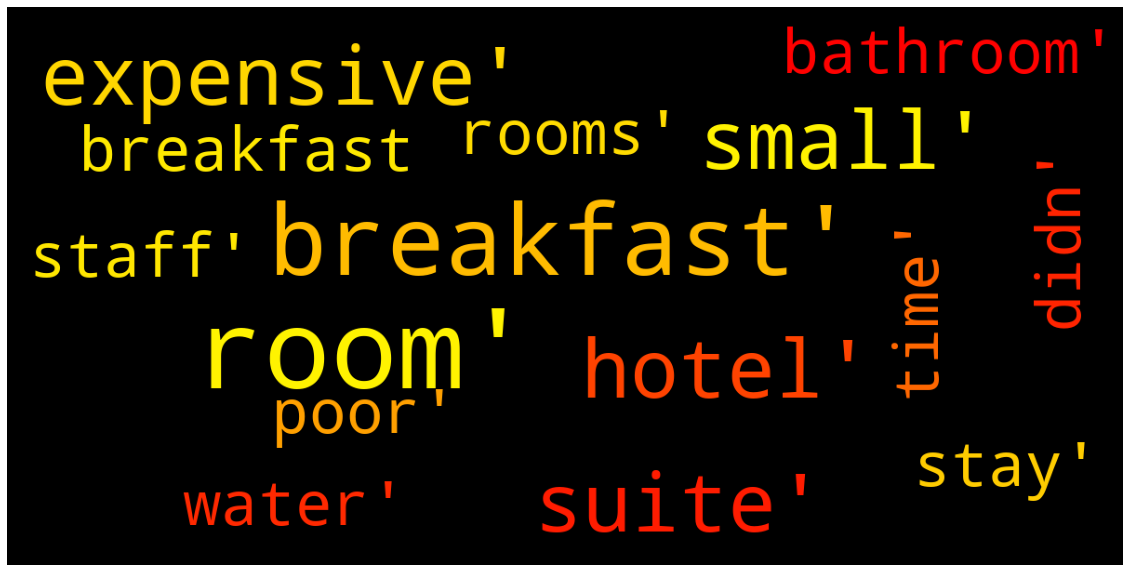

In [70]:
display = LDA_neg_topics.values.tolist()
show_wordcloud(display, 'autumn')

## Hotel Recommender by Country

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



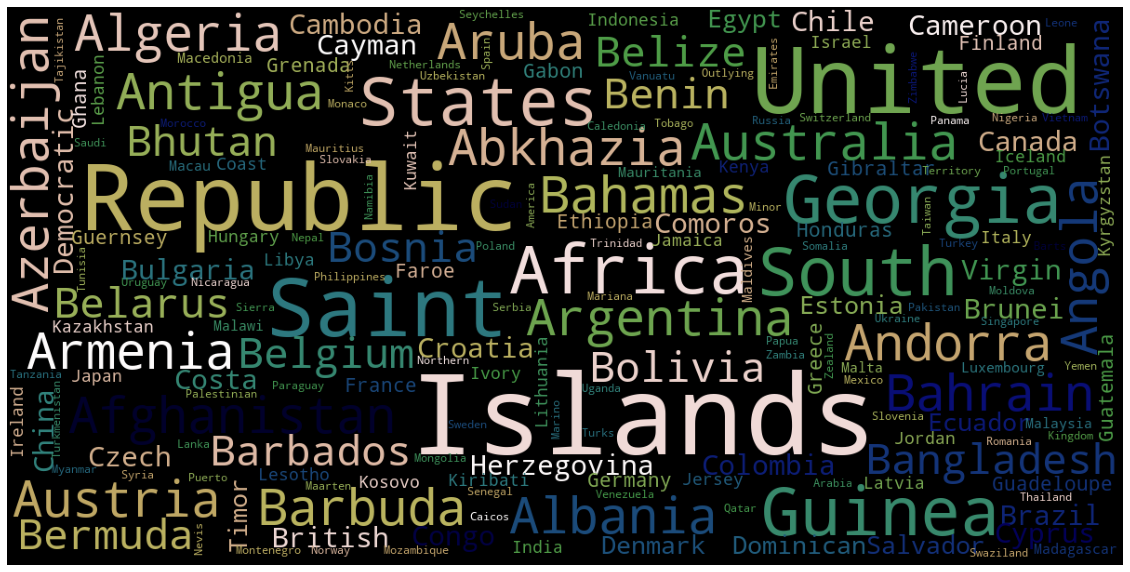

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Hotel_Address  \
0       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                  ...   
64804  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
64805  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
64806  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
64807  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
64808  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

                  Hotel_Name Reviewer_Nationality  Average_Score  user_id  \
0                Hotel Arena              Russia             7.7      139   
1                Hotel Arena             Ireland             7.7       77   
2                Hotel Arena             Belgium             7.7       19   
3                Hotel Arena              Norway             7.7      125   
4                Hotel Arena      United Kingdom             7.7      176   
...                      ...                  ...            ...      ...   
64804  Atlantis Hotel Vienna      United Kingdom             8.1      176   
64805  Atlantis Hotel Vienna             Romania             8.1      138   
64806  Atlantis Hotel Vienna      United Kingdom             8.1      176   
64807  Atlantis Hotel Vienna             Romania             8.1      138   
64808  Atlantis Hotel Vienna               Italy             8.1       80   

       hotel_id hotel_user  
0           566     566139  
1           566      56677  
2           566      56619  
3           566     566125  
4           566     566176  
...         ...        ...  
64804        80      80176  
64805        80      80138  
64806        80      80176  
64807        80      80138  
64808        80       8080  

[64751 rows x 7 columns]

In [71]:
# make dataset for recommender
#define required headers
recmdr_hdrs = ['Hotel_Address','Hotel_Name','Reviewer_Nationality','Average_Score']

recmdr_df = make_data_set(recmdr_hdrs, master_data )

recmdr_df, hotel_list, user_list = add_user_hotel(recmdr_df)

recmdr_df

In [72]:
#take a sample of 1000
recmdr_df_sml = recmdr_df[:1000]

#remove duplicates
recmdr_df_sml = recmdr_df_sml.drop_duplicates(subset='hotel_user', keep='first')

# Setup lookup dict
user_hotel_map = []
hotel_user_map = []

user_hotel_map = defaultdict(list)
hotel_user_map = defaultdict(list)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [73]:
len(recmdr_df_sml)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



219

In [74]:
# data cleanup
recmdr_df_sml = recmdr_df_sml.sort_values(by='user_id')

recmdr_df_sml = recmdr_df_sml.reset_index(drop=True)
#pass data into default dict
user_hotel_map,hotel_user_map = make_map(recmdr_df_sml)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [75]:
country = input("Which country are you from? "+ '\n')
user_id = find_user_id(country,user_list)
user_id = int(user_id)
rec_hotel = get_hotel_recmd(hotel_user_map,user_hotel_map,user_id)
rec_hotel_list = find_hotel_name(rec_hotel,hotel_list)

output_str = '\n'.join(map(str, rec_hotel_list))
print('\n'+"Top 5 recommended Hotels:  " +'\n'+ output_str)

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Which country are you from? 
Singapore

Top 5 recommended Hotels:  
Park Plaza County Hall London
The Park Grand London Paddington
Apex Temple Court Hotel
Grand Royale London Hyde Park
Hotel Arena


In [76]:
#Possible Countries
#Ireland
#Singapore
#Japan

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
user_list

C:\Users\Admin\anaconda3\envs\metis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{' ': '0',
 ' Abkhazia Georgia ': '1',
 ' Afghanistan ': '2',
 ' Albania ': '3',
 ' Algeria ': '4',
 ' Andorra ': '5',
 ' Angola ': '6',
 ' Antigua Barbuda ': '7',
 ' Argentina ': '8',
 ' Armenia ': '9',
 ' Aruba ': '10',
 ' Australia ': '11',
 ' Austria ': '12',
 ' Azerbaijan ': '13',
 ' Bahamas ': '14',
 ' Bahrain ': '15',
 ' Bangladesh ': '16',
 ' Barbados ': '17',
 ' Belarus ': '18',
 ' Belgium ': '19',
 ' Belize ': '20',
 ' Benin ': '21',
 ' Bermuda ': '22',
 ' Bhutan ': '23',
 ' Bolivia ': '24',
 ' Bosnia and Herzegovina ': '25',
 ' Botswana ': '26',
 ' Brazil ': '27',
 ' British Virgin Islands ': '28',
 ' Brunei ': '29',
 ' Bulgaria ': '30',
 ' Cambodia ': '31',
 ' Cameroon ': '32',
 ' Canada ': '33',
 ' Cayman Islands ': '34',
 ' Central Africa Republic ': '35',
 ' Chile ': '36',
 ' China ': '37',
 ' Colombia ': '38',
 ' Comoros ': '39',
 ' Costa Rica ': '40',
 ' Croatia ': '41',
 ' Cura ao ': '42',
 ' Cyprus ': '43',
 ' Czech Republic ': '44',
 ' Democratic Republic of the Con